In [2]:
from gplearn.genetic import SymbolicRegressor
from sklearn.utils.random import check_random_state

import numpy as np
import matplotlib.pyplot as plt

import graphviz

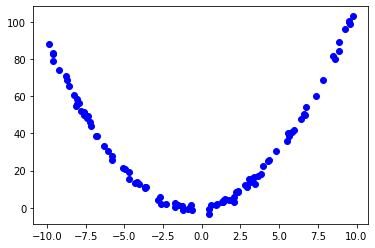

In [3]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-10, 10, 100).reshape(-1,1)
y_train = X_train**2 + X_train + 1.5*np.random.randn(100,1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_train, y_train, color='blue')
plt.show()

In [8]:
est_gp = SymbolicRegressor(population_size=500,
                           generations=30, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

/Users/vetovazquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    46.66           155572       31          1.32418          1.13822     11.93s
   1    34.51          192.123       11          1.08569          1.70914      7.71s
   2    19.70          38.9492       11          1.11559          1.44004      6.07s
   3     9.45          20.2287        7          1.08191          1.74283      4.84s
   4     7.94          24.9747        7          1.06782          1.86963      4.62s
   5     6.76          21.6802       11          1.07823          1.77634      4.39s
   6     6.34          22.2695        7          1.06708           1.8763      4.15s
   7     6.86          21.6534        7          1.07559          1.79974      3.86s
   8     6.69          259.169        7          1.07392          1.81471  

SymbolicRegressor(generations=30, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [9]:
print(est_gp._program)

add(mul(X0, X0), add(X0, 0.359))


In [ ]:
#est_gp._program.

In [7]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('/ex1_child', format='png', cleanup=True)
graph

OSError: [Errno 30] Read-only file system: '/ex1_child'

![title](ex1_child.png)